In [1]:
import pylab as plt1
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import nibabel as nb
import glob
import re
import time
import csv
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

from nilearn import plotting
from nilearn import image as nli
from matplotlib import style
from pathlib import Path
from os import listdir
from os.path import isdir, join
from PIL import Image
from PyPDF2 import PdfFileMerger

%matplotlib inline

In [2]:
path_ids = '/opt/dora/Dora/Estudio_ELA/Resultados/ASL_connect'
basename_without_ext = os.listdir(path_ids)
# print(basename_without_ext)
controls = []
patients = []
for file in basename_without_ext:
#     print(file)
    m = re.findall(r"^\w+",file)
#     print(m)
    if m == ['C']:
        controls.append(file)
    if m == ['P']:
        patients.append(file)

controls.sort()
patients.sort()
ids = controls+patients
print(ids)

[]


In [3]:
path_ids = '/opt/dora/Dora/Estudio_ELA/Resultados/ASL_connect'
paths_files = []
paths_ids = glob.iglob(path_ids+'/**/*/perfusion_mni_.nii.gz',recursive=True)

for filename in paths_ids:
    paths_files.append(filename)


In [4]:
paths_files = []
paths_ids = glob.iglob(path_ids+'/**/*/perfusion_mni_.nii.gz',recursive=True)
aux = 0

for filename in paths_ids:
    paths_files.append(filename)
    
paths_files.sort()
#print(paths_files)
img_quality = []
pdfs = []

for filename in paths_files:
    
    ids = filename.split("/",9)
    ids_names_m = np.array(ids)[7]+'/'+np.array(ids)[8]
    sec = np.array(ids)[8].split("_",5)
    secuence = (np.array(ids)[7]+" "+sec[2]+" "+sec[3]+" "+sec[4])
    
    image1 = path_ids+'/'+ids_names_m+"/algo1.png"
    image2 = path_ids+'/'+ids_names_m+"/algo2.png"
    image3 = path_ids+'/'+ids_names_m+"/algo3.png"
    
    c1_mni = nli.load_img(path_ids+"/"+ids_names_m+"/c1_gm_sm_mni_0.5.nii.gz")
    c1_get_data = c1_mni.get_fdata()
    c1_perfusion = np.sum(c1_get_data)/np.count_nonzero(c1_get_data)
    c2_mni = nli.load_img(path_ids+"/"+ids_names_m+"/c2_wm_sm_mni_0.5.nii.gz")
    c2_get_data = c2_mni.get_fdata()
    c2_perfusion = np.sum(c2_get_data)/np.count_nonzero(c2_get_data)
    perfusion_mni = nli.load_img(path_ids+"/"+ids_names_m+"/perfusion_mni_.nii.gz")
    perfusion_mni_data = perfusion_mni.get_fdata()
    all_perfusion = np.sum(perfusion_mni_data)/np.count_nonzero(perfusion_mni_data)
    
    plotting.plot_anat(filename,title = secuence + " perfusion_val : {}".format(all_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image1, cmap = "jet")
    plotting.plot_anat((path_ids+"/"+ids_names_m+"/c1_gm_sm_mni_0.5.nii.gz"),title = "c1_gm_0.50" + " perfusion_val : {}".format(c1_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image2, cmap = "jet")
    plotting.plot_anat((path_ids+"/"+ids_names_m+"/c2_wm_sm_mni_0.5.nii.gz"),title = "c2_wm_0.50" + " perfusion_val : {}".format(c2_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image3, cmap = "jet")
    
    image_1 = Image.open(image1)
    image_2 = Image.open(image2)
    image_3 = Image.open(image3)
    im_1 = image_1.convert('RGB')
    im_2 = image_2.convert('RGB')
    im_3 = image_3.convert('RGB')
    image_list = [im_2, im_3]
    im_1.save(path_ids+"/quality_images1/quality_gray{}.pdf".format(aux),save_all = True, append_images=image_list)
    pdfs.append(path_ids+"/quality_images1/quality_gray{}.pdf".format(aux))
    #os.remove(image1)
    #os.remove(image2)
    #os.remove(image3)
    aux += 1
    print(ids_names_m)

merger = PdfFileMerger()
for pdf in pdfs:
    merger.append(pdf)
    
merger.write(path_ids+"/quality_images1/Results_quality_gray_img.pdf")
merger.close()


sub-C001/wip_pcasl_conn_L1500_P1500_1seg
sub-C002/wip_pcasl_conn_L1500_P1500_1seg
sub-C003/wip_pcasl_conn_L1500_P1500_1seg
sub-C004/wip_pcasl_conn_L1500_P1500_1seg
sub-C005/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C006/wip_pcasl_conn_L1500_P1500_1seg
sub-C007/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C008/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C008/wip_pcasl_perf_L1800_P1800_3seg
sub-C009/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C010/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C011/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C012/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C013/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C014/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C015/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C016/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C016/wip_pcasl_perf_L1800_P1800_3seg
sub-C017/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C018/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C018/wip_pcasl_perf_L1800_P1800_3seg
sub-C019/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-C019/wip_pcasl_perf_L180

/tmp/ipykernel_584736/3312689279.py:26: RuntimeWarning: invalid value encountered in double_scalars
  c1_perfusion = np.sum(c1_get_data)/np.count_nonzero(c1_get_data)
/tmp/ipykernel_584736/3312689279.py:29: RuntimeWarning: invalid value encountered in double_scalars
  c2_perfusion = np.sum(c2_get_data)/np.count_nonzero(c2_get_data)
/tmp/ipykernel_584736/3312689279.py:32: RuntimeWarning: invalid value encountered in double_scalars
  all_perfusion = np.sum(perfusion_mni_data)/np.count_nonzero(perfusion_mni_data)


sub-P002-2/wip_pcasl_mDelay_L2000_P1000-4600_2seg
sub-P002/wip_pcasl_conn_L1500_P1500_1seg
sub-P003-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P003/wip_pcasl_conn_L1500_P1500_1seg
sub-P004-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P004/wip_pcasl_conn_L1500_P1500_1seg
sub-P005-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P005/wip_pcasl_conn_L1500_P1500_1seg
sub-P006-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P006/wip_pcasl_conn_L1500_P1500_1seg
sub-P007-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P007/wip_pcasl_conn_L1500_P1500_1seg
sub-P008/wip_pcasl_conn_L1500_P1500_1seg
sub-P009-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P009/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P010-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P010/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P011-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P011/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P012/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P013-2/wip_pcasl_conn_L1300_P1800_1seg_p2c2
sub-P013/wip_pcasl_conn_L1300_P1800_1seg_p2c2
s

In [37]:
#QUALITY IMAGES FOR BOLD

#path_bold_ids = '/opt/dora/Dora/Estudio_ELA/Resultados/Conectividad_BOLD'
#bolds_quality_img = os.listdir(path_bold_ids)
# print(basename_without_ext)
#bold_ctr = []
#bold_pat = []
#for file in bolds_quality_img:
#     print(file)
#    m = re.findall(r"^\w+",file)
#     print(m)
#    if m == ['C']:
#        bold_ctr.append(file)
#    if m == ['P']:
#        bold_pat.append(file)

# bold_ctr.sort()
# bold_pat.sort()
# ids_bold = bold_ctr+bold_pat

# for id_bols in ids_bold:
#     path_bold = path_bold_ids+'/'+id_bols+'/ep2d_bold_resting_p2_s3/'+id_bols+'.nii'
#     img_bold = nli.mean_img(path_bold)
#     plotting.view_img(img_bold, bg_img = False

#IBEAS

path_ids = '/opt/dora/Dora/IBEAS/Resultados/ASL_multiple_pcasl'

paths_files = []
paths_ids = glob.iglob(path_ids+'/***/**/*/asl_mni_result.nii.gz',recursive=True)
aux = 0

for filename in paths_ids:
    paths_files.append(filename)
    
paths_files.sort()
img_quality = []
pdfs = []

<generator object _iglob at 0x7f9666a2ccf0>


KeyboardInterrupt: 

In [5]:
for filename in paths_files:
    
    ids = filename.split("/",9)
    ids_names_m = np.array(ids)[7]+'/'+np.array(ids)[8]+'/'+np.array(ids)[9]
    names_ids = np.array(ids)[7]+'/'+np.array(ids)[8]
    #print(ids_names_m)
    
    image1 = path_ids+'/'+names_ids+"/algo1.png"
    image2 = path_ids+'/'+names_ids+"/algo2.png"
    image3 = path_ids+'/'+names_ids+"/algo3.png"
    
#     c1_mni = nli.load_img(path_ids+"/"+ids_names_m+"/c1_gm_sm_mni.nii.gz")
#     c1_get_data = c1_mni.get_fdata()
#     c1_perfusion = np.sum(c1_get_data)/np.count_nonzero(c1_get_data)
#     c2_mni = nli.load_img(path_ids+"/"+ids_names_m+"/c2_wm_sm_mni.nii.gz")
#     c2_get_data = c2_mni.get_fdata()
#     c2_perfusion = np.sum(c2_get_data)/np.count_nonzero(c2_get_data)
    perfusion_mni = nli.load_img(path_ids+"/"+ids_names_m)
    perfusion_mni_data = perfusion_mni.get_fdata()
    all_perfusion = np.sum(perfusion_mni_data)/np.count_nonzero(perfusion_mni_data)
    
    plotting.plot_anat(filename,title = np.array(ids)[7] + " perfusion_val : {}".format(all_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image1)#, cmap = "jet")
#     plotting.plot_anat((path_ids+"/"+ids_names_m+"/c1_gm_sm_mni.nii.gz"),title = "c1_gm_0.65" + " perfusion_val : {}".format(c1_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image2, cmap = "jet")
#     plotting.plot_anat((path_ids+"/"+ids_names_m+"/c2_wm_sm_mni.nii.gz"),title = "c2_wm_0.50" + " perfusion_val : {}".format(c2_perfusion),display_mode='z',dim=1,cut_coords=[-20,-10,0,10,20,30],output_file=image3, cmap = "jet")
    
    image_1 = Image.open(image1)
#     image_2 = Image.open(image2)
#     image_3 = Image.open(image3)
    im_1 = image_1.convert('RGB')
#     im_2 = image_2.convert('RGB')
#     im_3 = image_3.convert('RGB')
#     image_list = [im_2, im_3]
    im_1.save(path_ids+"/quality_images1/quality_gray{}.pdf".format(aux),save_all = True)
    pdfs.append(path_ids+"/quality_images1/quality_gray{}.pdf".format(aux))
    os.remove(image1)
#     #os.remove(image2)
#     #os.remove(image3)
    aux += 1
#     print(ids_names_m)

merger = PdfFileMerger()
for pdf in pdfs:
    merger.append(pdf)
    
merger.write(path_ids+"/quality_images1/Results_quality_gray_img.pdf")
merger.close()

<BarContainer object of 54 artists>

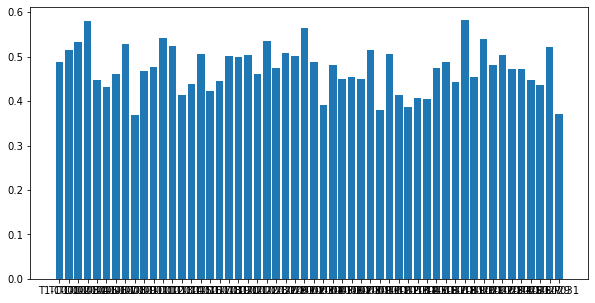

In [3]:
stats_pathways = '/opt/dora/Dora/Estudio_ELA/Resultados/DTI/Act_54_subj/ctr-pac0/stats'
# paths_tracts = glob.iglob(stats_pathways+'/**/*/*.txt',recursive=True)

os.chdir(stats_pathways)
paths_tracts = glob.glob('*.txt')

data = pd.read_csv(stats_pathways+"/lh.fat.avg16_syn_bbr.FA_Avg.txt",sep = ' ') 
head = data.columns
head = list(head[:-1])
#data.plot.scatter(x = data, y = '0', s = 100);
plt.figure(figsize=(10,5))
plt.bar(head, data.iloc[2][:-1])
#patata = plt.xticks(head,rotation=90)
# print(data.iloc[1][:-1])

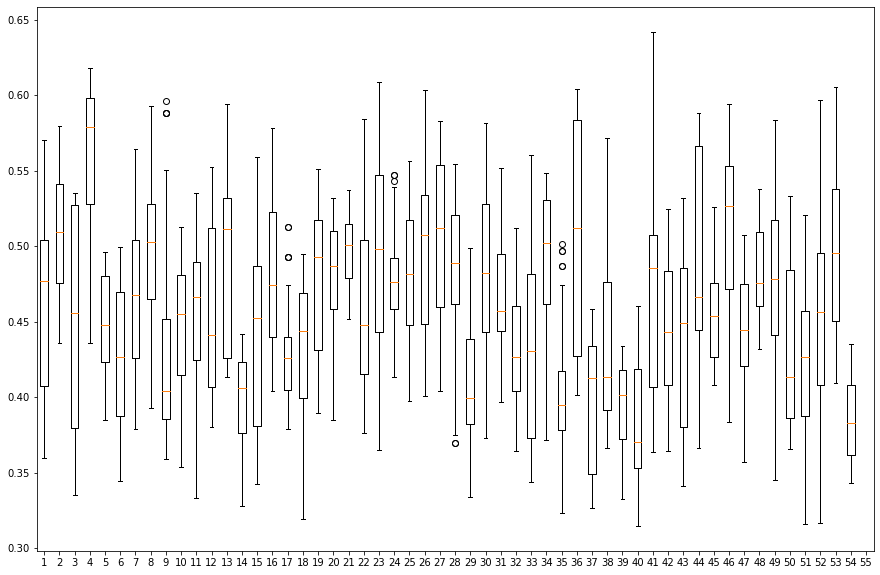

In [4]:
fig = plt.figure(figsize =(15, 10))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [40]:
path_ids = '/opt/dora/Dora/ELA/'

paths_files = []
paths_ids = glob.iglob(path_ids+'/**/t1_mprage*/*.nii',recursive=True)
print(paths_ids)

for filename in paths_ids:
    paths_files.append(filename)
    ids = filename.split("/",6)
    ids_name = ids[5]
    print(ids_name)

<generator object _iglob at 0x7f966b394890>
C-001
C-002
C-003
C-004
C-005
C-006
C-007
C-008
C-009
C-010
C-011
C-012
C-013
C-014
C-015
C-016
C-017
C-018
C-019
C-020
C-021
C-022
C-023
C-027
C-027
C-029
C-029
P-001
P-001
P-001-02
P-002
P-002-02
P-003
P-003-02
P-004
P-004-02
P-005
P-005-02
P-006
P-006-02
P-007
P-007-02
P-008
P-009
P-009-02
P-010
P-010-02
P-011
P-011-02
P-012
P-013
P-013-02
P-014
P-014-02
P-015
P-016
P-016-02
P-017
P-017-02
P-018
P-018-02
P-019
P-020
P-020-02
P-021
P-021
P-021
P-022
P-023
P-024
P-024
P-025
P-025
P-026
P-026
P-027
P-027
P-029
P-029
P-031


/home/quizhpilema.134643/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


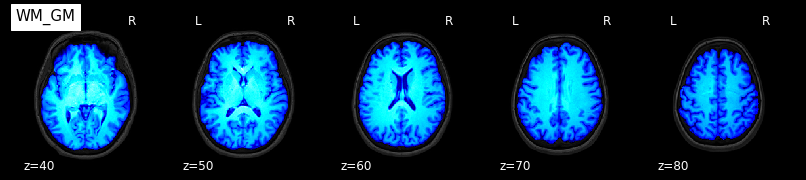

In [7]:
t1 = '/opt/dora/Dora/ELA/C-003/t1_mprage_sag_p2_iso_ns/t1_mprage_sag_p2_iso_ns_t1_mprage_sag_p2_iso_ns_20200120175818_5.nii'
wm = '/opt/dora/Dora/Estudio_ELA/Resultados/Volumetria/T1-C003/mri/brainmask.nii'
isExist = os.path.exists(wm)
if isExist == False:
    !mri_convert /opt/dora/Dora/Estudio_ELA/Resultados/Volumetria/T1-C003/mri/brainmask.mgz /opt/dora/Dora/Estudio_ELA/Resultados/Volumetria/T1-C003/mri/brainmask.nii

display = plotting.plot_anat(t1, title = 'WM_GM',display_mode='z',dim=2,cut_coords=[40,50,60,70,80])
display.add_overlay(wm, cmap=plotting.cm.black_blue, threshold=3)
plotting.show()

In [ ]:
#Resample
mni = '/usr/local/fsl/data/standard/MNI152_T1_2mm.nii.gz'
asl_files_mni_c1 = '/opt/dora/Dora/Estudio_ELA/Resultados/ASL_connect/C-001/wip_pcasl_conn_L1500_P1500_1seg/c1_gm_sm_mni.nii.gz'
asl_files_mni_c2 = '/opt/dora/Dora/Estudio_ELA/Resultados/ASL_connect/C-001/wip_pcasl_conn_L1500_P1500_1seg/c2_wm_sm_mni.nii.gz'

In [ ]:
mni_152 = nli.load_img(mni)
c1_mni = nli.load_img(asl_files_mni_c1)
c2_mni = nli.load_img(asl_files_mni_c2)
print(mni_152.shape)
print(c1_mni.shape)
print(c2_mni.shape)
data=c2_mni.get_fdata()
print(data)

In [ ]:
resampled_t1 = nli.resample_to_img(mean,mni_152)
resampled_t1.shape

In [ ]:
plotting.plot_anat(mni_152,title='MNI152',display_mode='z',dim=-1,cut_coords=[-20,-10,0,10,20,30])
plotting.plot_anat(resampled_t1,title='asl_to_mni',display_mode='z',dim=-1,cut_coords=[-20,-10,0,10,20,30])

In [ ]:
resampled_t1.to_filename('asl_to_mni_prove.nii.gz')
img = nb.load('asl_to_mni_prove.nii.gz')

In [ ]:
data=img.get_fdata()
data.shape

In [ ]:
affine = img.affine
affine

In [ ]:
header = img.header['pixdim']
header

In [ ]:
plt1.imshow(data[:,:,data.shape[2]//2].T,cmap='Greys_r')
print(data.shape)

In [ ]:
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)
print("Affine:")
print(affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

In [ ]:
nb.aff2axcodes(affine)

In [ ]:
nb.affines.voxel_sizes(affine)